# Вводная часть

У вас в распоряжении есть данные  с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Нам предстоит изучить:

- как люди пользуются продуктом,
- когда они начинают покупать,
- сколько денег приносит каждый клиент
- когда клиент окупается.

## Шаг 1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')

In [3]:
visits.sample(10)

,Device,End Ts,Source Id,Start Ts,Uid
235601,desktop,2017-12-30 16:50:00,4,2017-12-30 16:26:00,5220201325413176641
225601,desktop,2017-09-15 20:38:00,1,2017-09-15 20:33:00,12450833536392251179
67258,desktop,2017-12-06 15:39:00,4,2017-12-06 15:38:00,18012760501208244646
265776,touch,2017-12-30 12:25:00,4,2017-12-30 12:24:00,15869396617211049797
126219,desktop,2017-11-27 09:48:00,5,2017-11-27 09:33:00,10771815891489584814
191626,desktop,2017-12-04 09:36:00,5,2017-12-04 09:35:00,4960150029677795793
182858,touch,2017-07-05 23:58:00,2,2017-07-05 23:58:00,12431131023929560165
97305,desktop,2017-12-21 23:57:00,3,2017-12-21 23:43:00,14258773115501684367
173662,desktop,2018-03-18 16:54:00,5,2018-03-18 16:52:00,2304428357721304776
249656,desktop,2017-11-12 01:10:00,4,2017-11-12 01:05:00,6519571427375183703


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits['Device'].value_counts() # смотрим на количество устройств 

desktop    262567
touch       96833
Name: Device, dtype: int64

In [6]:
print('Сумарное количество пропущенных значений по столбцам:')
visits.isna().sum()

Сумарное количество пропущенных значений по столбцам:


Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [7]:
print('Количество дублирующихся строк:', visits.duplicated().sum())

Количество дублирующихся строк: 0


In [8]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts']) # изменимяем формат на datetime64
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

In [9]:
visits.columns = visits.columns.str.lower() # приведем заголовки в нижний регистр

In [10]:
visits = visits.rename(columns={'end ts': 'session_end_ts', 'start ts': 'session_start_ts', 'source id': 'source_id'})

In [11]:
# смотрим мин и макс дату
visits['session_end_ts'].describe()
# срезаем ошибочно попавшие данные
visits = visits.query('session_end_ts <= "2018-05-31 23:59:59"')
visits['session_end_ts'].describe()

count                  359388
unique                 224749
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-05-31 23:59:00
Name: session_end_ts, dtype: object

В таблице visits данные сервера о посещениях сайта на 359400 строк и 5 столбцов с информацией:

**1. Device** — категория устройства пользователя (в данных 2 вида устройств)

**2. End Ts** — дата и время окончания сессии

- необходимо изменить тип данных на datetime64

**3. Source Id** — идентификатор рекламного источника, из которого пришел пользователь

**4. Start Ts** — дата и время начала сессии

- необходимо изменить тип данных на datetime64

**5. Uid** — уникальный идентификатор пользователя
- ключ к таблице orders

In [12]:
orders = pd.read_csv('/datasets/orders_log.csv')

In [13]:
orders.sample(10)

,Buy Ts,Revenue,Uid
50313,2018-05-31 19:01:00,16.50,11108631484349381433
40752,2018-03-20 12:09:00,2.62,12812482283147801961
25885,2017-12-25 11:16:00,1.47,7046737606684150807
38475,2018-03-06 13:29:00,2.44,16793794371977178516
25951,2017-12-25 15:10:00,4.28,7920770819008700984
21896,2017-12-04 18:02:00,0.92,18055529966942244339
41408,2018-03-23 18:21:00,0.87,3995835870105214439
31389,2018-01-27 21:34:00,0.61,10844039276721006520
6087,2017-08-26 16:41:00,41.55,14369495004814956304
40338,2018-03-17 19:57:00,1.83,6962695890975881689


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [15]:
print('Количество дублирующихся строк:', orders.duplicated().sum())

Количество дублирующихся строк: 0


In [16]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [17]:
orders.columns = orders.columns.str.lower() # приведем заголовки в нижний регистр

In [18]:
orders = orders.rename(columns={'buy ts': 'buy_ts'}) # приведем название заголовков к корректным названиям

In [19]:
# смотрим мин и макс дату
orders['buy_ts'].describe()
# срезаем ошибочно попавшие данные
orders = orders.query('buy_ts <= "2018-05-31 23:59:59"')
orders['buy_ts'].describe()

count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

В таблице visits данные сервера о заказах, и их соимости, на 50415 строк и 3 столбцах с информацией:

**1. Uid** — уникальный id пользователя, который сделал заказ
- ключ к таблице visits

**2. Buy Ts** — дата и время заказа
- необходимо изменить тип данных на datetime64

**3. Revenue** — выручка Яндекс.Афиши с этого заказа    

In [20]:
costs = pd.read_csv('/datasets/costs.csv')

In [21]:
costs.sample(10)

,source_id,dt,costs
2499,10,2018-04-19,18.97
890,3,2017-11-12,564.78
1938,9,2017-10-01,17.64
2388,10,2017-12-27,21.51
2142,9,2018-04-25,15.39
573,2,2017-12-28,195.88
2114,9,2018-03-26,29.06
2038,9,2018-01-09,15.72
1839,9,2017-06-24,5.36
2018,9,2017-12-20,20.70


In [22]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [23]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [24]:
# смотрим мин и макс дату
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

В таблице costs информация о затратах на маркетинг на 2541 строку и 3 столбцах с информацией:

**1. source_id** — идентификатор рекламного источника
- может служить ключем к таблице visits (при группировке)

**2. dt** — дата
- необходимо изменить тип данных на datetime64

**3. costs** — затраты на этот рекламный источник в этот день

#### Вывод

По всем выгрузкам привели названия столбцов к нижнему регистру, так же убрали пробелы. Дублирующих строк обнаружено не было. Привели тип данных с датами в формат datetime. Обнаружили ошибку, заявлено что данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года, а в выгрузке присутствовали данные июня 2018, сделали срез лишних данных.

## Шаг 2. Постройте отчёты и посчитайте метрики

### 2.1 Отчет по продукту

#### 1. Посчитаем сколько людей пользуются в день, неделю, месяц нашим продуктом(метрики: DAU, WAU, MAU):

In [25]:
visits

,device,session_end_ts,source_id,session_start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [26]:
visits['session_year'] = visits['session_start_ts'].dt.year # год
visits['session_month'] = visits['session_start_ts'].dt.month # месяц
visits['session_week'] = visits['session_start_ts'].dt.week # неделя
visits['session_date'] = visits['session_start_ts'].dt.date # полная дата

In [27]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359388 entries, 0 to 359399
Data columns (total 9 columns):
device              359388 non-null object
session_end_ts      359388 non-null datetime64[ns]
source_id           359388 non-null int64
session_start_ts    359388 non-null datetime64[ns]
uid                 359388 non-null uint64
session_year        359388 non-null int64
session_month       359388 non-null int64
session_week        359388 non-null int64
session_date        359388 non-null object
dtypes: datetime64[ns](2), int64(4), object(2), uint64(1)
memory usage: 27.4+ MB


Сгруппируем данные по уникальному пользователю в день, месяц, неделю и найдем среднее

In [28]:
# уникальные пользователи в среднем в день
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
# уникальные пользователи в среднем в неделю
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
# уникальные пользователи в среднем в месяц
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [29]:
print('Уникальные пользователи в среднем в день:', int(dau_total))
print('Уникальные пользователи в среднем в неделю:', int(wau_total))
print('Уникальные пользователи в среднем в месяц:', int(mau_total))

Уникальные пользователи в среднем в день: 907
Уникальные пользователи в среднем в неделю: 5716
Уникальные пользователи в среднем в месяц: 23227


Посчитаем как часто пользователь обращается к нашему продукту (метрика: sticky factor):

In [30]:
sticky_week = dau_total / wau_total * 100
sticky_month = dau_total / mau_total * 100

In [31]:
print('Использование продукта пользователя в неделю:', sticky_week)
print('Использование продукта пользователя в месяц:', sticky_month)

Использование продукта пользователя в неделю: uid    15.884396
dtype: float64
Использование продукта пользователя в месяц: uid    3.908961
dtype: float64


Мы видим что у нас хороший прирост уникальных пользователей в неделю/месяц/год. Так же вовлеченность пользователей в неделю и месяц составляет 16% и 4% соответственно. Данная вовлеченность указывает на лояльность пользователя к нашему продукту, чем она больше, тем лучше мы сможем монетизировать наш продукт.

#### 2. Найдем количество сессий на одного пользователя в день, посмотрим сколько длится сессия пользователя (метрика ASL)

In [32]:
sessions_per_user = visits.groupby('session_date').agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user = sessions_per_user.reset_index()
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

In [33]:
sessions_per_user.sample(10)

,session_date,n_sessions,n_users,sess_per_user
259,2018-02-15,1509,1390,1.085612
150,2017-10-29,1206,1127,1.070098
177,2017-11-25,2089,1817,1.149697
166,2017-11-14,1373,1270,1.081102
348,2018-05-16,943,848,1.112028
73,2017-08-13,293,281,1.042705
137,2017-10-16,1269,1168,1.086473
113,2017-09-22,884,798,1.107769
17,2017-06-18,306,285,1.073684
251,2018-02-07,1354,1250,1.083200


In [34]:
print('Среднее количество сессий одним пользователем в день:', sessions_per_user['sess_per_user'].mean())

Среднее количество сессий одним пользователем в день: 1.0821671112951867


В среднем один пользователь в день проводит одну сессию. Для такого продукта как Яндекс.Афиши это хорошие показатели, потому что анонс новых событий происходит не так часто, многие пользователи явно мониторят анонсы событий ежедневно.

Найдём ASL — посчитаем длину всех сессий и вычислим их среднее значение:

In [35]:
visits['session_duration_sec'] = (visits['session_end_ts'] - visits['session_start_ts']).dt.seconds

count    359388.000000
mean        643.465703
std        1016.280993
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

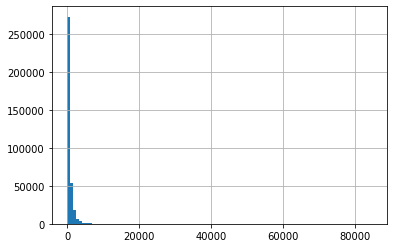

In [36]:
visits['session_duration_sec'].hist(bins=100)
visits['session_duration_sec'].describe()

Длина сессий распределена не равномерно. Стандартное отклонение достаточно большое. Поэтому в качестве меры центральной тенденции нам не подходит ни медиана, ни среднее. Расчитаем моду.

In [37]:
asl = visits['session_duration_sec'].mode()
print('Самое частое значение сессии пользователя составляет:', asl)

Самое частое значение сессии пользователя составляет: 0    60
dtype: int64


Чаще всего пользователи проводят на Яндекс.Афиши 60 секунд. За это время вполне можно просмотреть новые события за сутки, или найти конкретное мероприятие и приобрести на него билеты. 

#### 3. Посмотрим как часто люди повторно возвращаются к продукту

Для этого разобьем пользователей на когорты по месяцам, и найдем количество уникальных пользователей в каждой когорте, каждого месяца.

In [38]:
first_session = visits.groupby('uid')['session_start_ts'].min()
first_session.name = 'first_session_date'

In [39]:
visits = visits.join(first_session, on='uid')

In [40]:
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')
visits['session_start_month'] = visits['session_start_ts'].astype('datetime64[M]')

In [41]:
count_uid_pivot = visits.pivot_table(index='first_session_month', 
                                     columns='session_start_month', 
                                     values='uid', 
                                     aggfunc='nunique')

In [42]:
count_uid_pivot

session_start_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_session_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


Как мы уже ранее находили в метрике WAU уникальное количество пользователей в месяц в среднем примерно 23228 пользователей сервиса. Но на второй месяц жизни каждой когорты остается не больше 8% пользователей. И динамика, с каждым месяцем, зачастую убывающая. Самая "неудачная" в этом плане когорта пользователей от 2017-08-01, в ней заметно меньше всего пользователей как в первый, так и в последующие месяцы. Возможно это связано с какими то техническими сбоями на сервисе, или сезонностью событий (август месяц отпусков, в этой связи и меньшее число организованных событий).

Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:

In [43]:
visits['cohort_lifetime'] = (visits['session_start_month'] - visits['first_session_month']) / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [44]:
count_uid_pivot = visits.pivot_table(index='first_session_month', 
                                     columns='cohort_lifetime', 
                                     values='uid', 
                                     aggfunc='nunique')
count_uid_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Найдем коэффицент удержания (метрика Retention Rate). Для этого нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждую следующую неделю.
Найдём исходное количество пользователей в когорте. Возьмём их число на нулевую неделю:

In [45]:
cohorts = visits.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='first_session_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_session_month', 
                                      columns='cohort_lifetime', 
                                      values='retention', 
                                      aggfunc='sum')


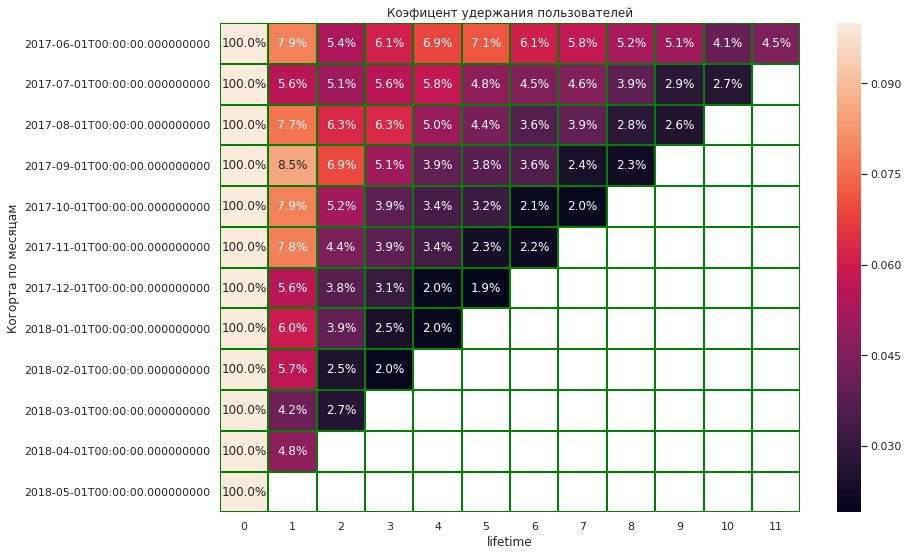

In [46]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Коэфицент удержания пользователей')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='green', vmax=0.1)
plt.xlabel('lifetime')
plt.ylabel('Когорта по месяцам')
plt.show()

Подтверждаем наш свод по количеству уникальных пользователей по месяцам метрикой Retention Rate. На второй месяц жизни каждой когорты остается в лучшем случае не больше 8% пользователей. Например, для мобильных игр такой коэффициент был бы смертельный, но для нашего сервиса данные показатели не так критичны. Зачастую пользователи заходят за покупкой билета на конкретное событие (будь то концерт любимой группы, или спектакль) и повторно ежемесячно заходить просто нет нужны. Для нашего сервиса более важна конверсия, что бы пользователь стал покупателем. А для повторных возвращений можно начислять бонусы за покупки, которые можно использовать при следующей покупке, что бы в случае необходимости приобретения билета возвращались к нашему сервису.

### 2.2 Отчет по продажам

#### 1. Ответим на вопрос: "Когда люди начинают покупать?"

Для этого посмотрим: 

- когда пользователь совершил первую сессию (информация уже содержится в переменной 'first_session')

- когда пользователь совершил первую покупки

- вычтем из даты первой покупки - дату первой сессии и узнаем сколько дней в среднем пользователю требуется для совершения покупки

In [47]:
# находим дату первой покупки
first_orders = orders.groupby('uid')['buy_ts'].min()
# меняем имя Series 
first_orders.name = 'first_orders_date'
# присоединяем таблицы
first_session = first_session.reset_index()
first_orders = first_orders.reset_index()
new_orders = first_orders.merge(first_session, on='uid')
#находим количество секунд от первой сессии до первой покупки
new_orders['nd'] = (new_orders['first_orders_date'] - new_orders['first_session_date']).dt.seconds


Время покупки не может быть равно или меньше 0, сделаем срез и посмотрим распределение.

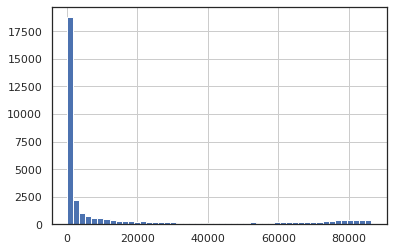

In [48]:
new_orders = new_orders.query('nd > 0')
new_orders['nd'].hist(bins=50)

Распределение не симетрично, с ярко выраженым пиком. В качестве меры центральной тенденции выберем моду.

In [49]:
print('Время между первым посещением и первой покупкой  составляет:', new_orders['nd'].mode())

Время между первым посещением и первой покупкой  составляет: 0    60
dtype: int64


Зачастую люди совершают первый заказ через минуту после посещения сервиса. Сразу видно, пользователи знают конкретную цель своего захода на сервис, и это приобретают. В качестве рекомендаций можно предлагать пользователю посмотреть похожие (на ранее приобретенные услуги) события.

#### 2. Ответим на вопрос: "Сколько раз покупают за период?"

Для ответа на этот вопрос сгрупируем количество покупок по месяцам, и посмотрим распределение по каждому периоду.

In [50]:
orders['month'] = orders['buy_ts'].astype('datetime64[M]')

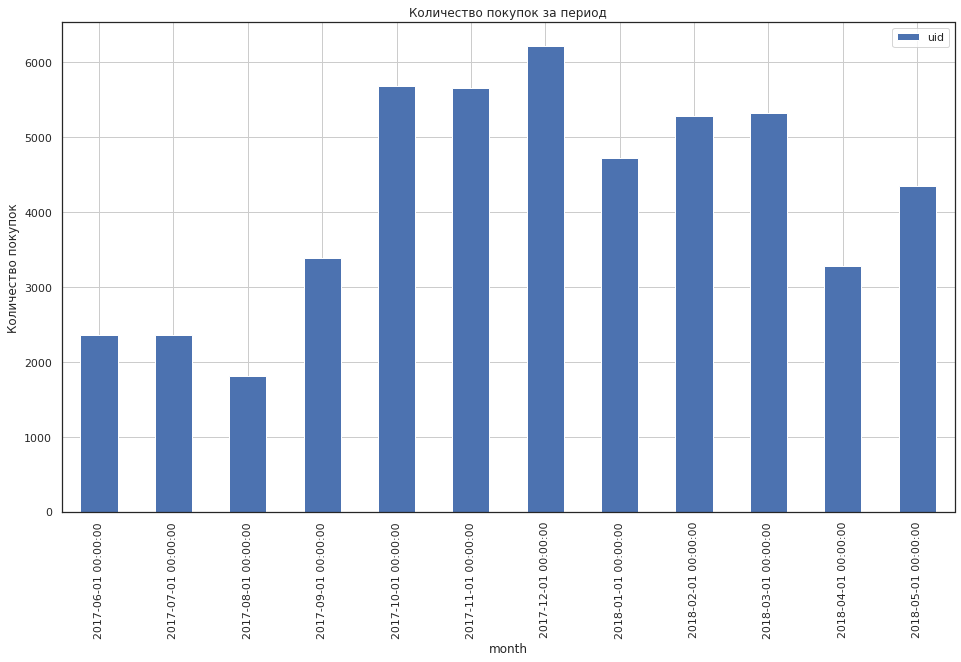

In [51]:
count_order = orders.groupby('month').agg({'uid': 'count'})
count_order.plot(kind='bar', grid=True, title='Количество покупок за период', figsize = (16, 9))
plt.ylabel('Количество покупок')
plt.show()

На распределении видна сезонность, в летние месяцы количество покупок меньше, с осени они начинают расти. Это связано с тем, что в летний период (сезон отпусков) проходит меньшее число событий, соответственно и продажи падают (меньше событий - меньше продажи). В качестве рекомендаций можно придумать акцию со скидками летом: "Покупай билет летом, а на концерт зимой" на зимние события летом скидка в 5%.

#### 3. Ответим на вопрос: "Какой средний чек?"

Для ответа на этот вопрос сгруппируем данные по когорте (первый месяц покупки) и месяцу покупки. Найдем средний чек каждого покупателя разделив доход с каждого покупателя на количество уникальных пользователей. 

In [52]:
orders = orders.merge(first_orders, on='uid')


In [53]:
orders['first_orders_month'] = orders['first_orders_date'].astype('datetime64[M]')
orders_grouped_by_cohorts = orders.groupby(['first_orders_month', 'month'])\
                                  .agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()

In [54]:
orders_grouped_by_cohorts['purchases_per_uid'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts.pivot_table(index='first_orders_month', 
                                      columns='month', 
                                      values='purchases_per_uid',
                                      aggfunc='mean')     

month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_orders_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026


Посмотрим на распределение в разрезе метрики lifetime (количестве месяцев жизни когорты):

In [55]:
#найдем lifetime
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['month'] - orders_grouped_by_cohorts['first_orders_month']) / np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype(int)
orders_grouped_by_cohorts.pivot_table(index='first_orders_month', 
                                      columns='cohort_lifetime', 
                                      values='purchases_per_uid',
                                      aggfunc='mean') 

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Во всех когортах средний чек растет после первого месяца, значит наша платформа смогла понравится пользователю после первой покупки. Так же нет падений среднего чека на протяжении времени, так в когорте от 2017-06-01 на протяжении года (за исключением первого и последнего месяца, где данные могут быть не все) средний чек держится на стабильном хорошем высоком уровне. А вот показатели среднего чека в следующей когорте 2017-07-01 сильно уменьшается по сравнению с когортой 2017-06-01. Но учитывая специфику нашего сервиса, средний чек - это не самая показательная статистика. Условный концерт мировой звезды в конкретный месяц может сильно увеличить средний чек.

#### 4. Ответим на вопрос: "Сколько денег приносят пользователи? (метрика LTV)"

Посмотрим сколько в среднем один клиент приносит дохода за свои покупки. Для этого:

- посчитаем количество уникальных клиентов в каждой когорте

- посчитаем ежемесячную прибыль в каждой когорте

- найдем возраст каждой когорты 

In [56]:
cohort_sizes = orders.groupby('first_orders_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_orders_month', 'n_buyers']

In [57]:
cohorts_revenu = orders.groupby(['first_orders_month', 'month']).agg({'revenue': 'sum'}).reset_index()

In [58]:
report = pd.merge(cohort_sizes, cohorts_revenu, on='first_orders_month')

Сумма доходов за каждую когорту уже посчитана, количество уникальных пользователей добавлена, осталось посчитать LTV. За маржинальность будет считать 100% дохода.

In [59]:
report['age'] = (report['month'] - report['first_orders_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['n_buyers']
output = report.pivot_table(
        index='first_orders_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
output = output.cumsum(axis = 1)

In [60]:
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Мы видим, что накопительный доход когорты 2017-09-01 превышает доход когорты 2017-06-01 у которой "время жизни" больше на 3 месяца.

### 2.3 Отчет по затратам на маркетинг

#### 1. Сколько денег потратили? Всего / на каждый источник / по времени

In [61]:
all_costs = costs['costs'].sum()
print('Сумма потраченых денек на маркетинг:', all_costs)

Сумма потраченых денек на маркетинг: 329131.62


In [62]:
source_group = costs.groupby('source_id')['costs'].sum().reset_index()
source_group['ratio_sourse'] = source_group['costs'] / all_costs *100
print('Сумма потраченая за весь период на каждый источник:')
display(source_group)

Сумма потраченая за весь период на каждый источник:


,source_id,costs,ratio_sourse
0,1,20833.27,6.329769
1,2,42806.04,13.005751
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
5,9,5517.49,1.676378
6,10,5822.49,1.769046


Ресурсы 6-8 не финансировались.

In [63]:
#добавим кагорты по месяцам
costs['month'] = costs['dt'].astype('datetime64[M]')
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


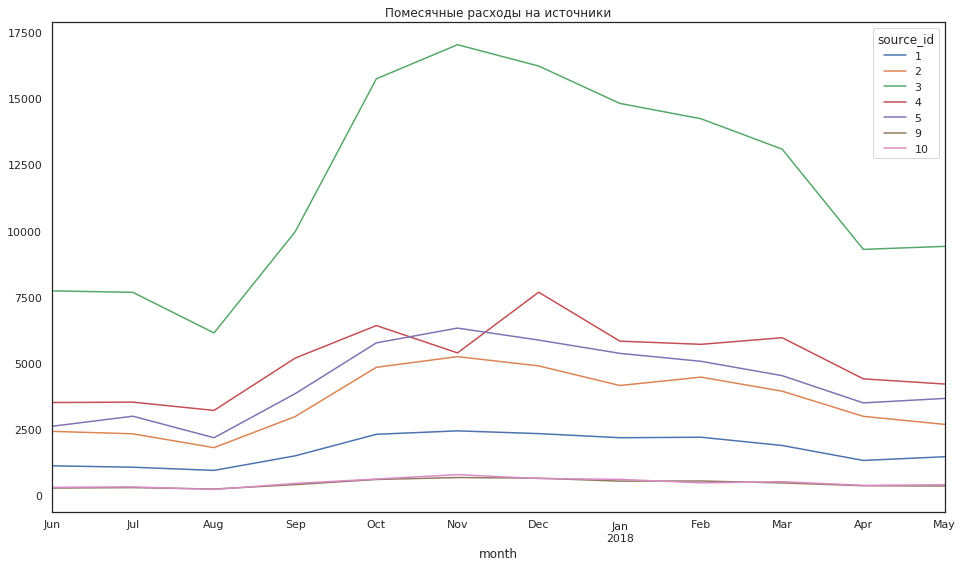

In [64]:
# сгрупируем по ежемесячным тратам на каждый источник
costs_group = costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
# сводная таблицу по каждой когорте (месяцу)
costs_group_pivit = costs_group.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum')
costs_group_pivit.plot(figsize=(16, 9), title='Помесячные расходы на источники')

На маркетинг за период с 01.06.2017 по 31.05.2018 было потрачено в сумме на все источники: 329131.62. Из них 43% было потрачено на источник 3. На графике так же видно превалирование расходов на этот источник над другими. На источники 6-8 вообще нет расходов. По всем источникам наиболее активный период расходов с августа по апрель.

#### 2. Сколько денег приносят пользователи? (метрика LTV)

Стоит отметить 2 важных нюанса:

- за маржинальность будем брать 100% дохода

- когорты будем делить не по месяцам, как это делали ранее, а по источникам.

In [65]:
visits

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,session_start_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,2017-11-01,0


In [66]:
# добавим по каждому покупателю дату первой покупке в таблицу с визитами
visits = visits.merge(first_orders, on='uid')

In [67]:
# определяем источник из которого пришел пользователь
sources = visits.sort_values(by = ['uid', 'first_session_date']).groupby('uid').agg({'source_id': 'first'})
# соединяем первые покупки и источники 
payers = first_orders.merge(sources, on = 'uid').reset_index()
payers = payers.rename(columns = {'first_orders_date': 'first_buy'})

In [68]:
payers

,index,uid,first_buy,source_id
0,0,313578113262317,2018-01-03 21:51:00,2
1,1,1575281904278712,2017-06-03 10:13:00,10
2,2,2429014661409475,2017-10-11 18:33:00,3
3,3,2464366381792757,2018-01-28 15:54:00,5
4,4,2551852515556206,2017-11-24 10:14:00,5
...,...,...,...,...
36517,36517,18445147675727495770,2017-11-24 09:03:00,5
36518,36518,18445407535914413204,2017-09-22 23:55:00,3
36519,36519,18445601152732270159,2018-03-26 22:54:00,2
36520,36520,18446156210226471712,2018-02-18 19:34:00,3


In [69]:
# считаем ltv
ltv = payers.merge(orders, on = 'uid')
# найдем метрику lifetime по каждому источнику
ltv['lifetime'] = ((ltv['buy_ts'] - ltv['first_buy']) / np.timedelta64(1,'M')).round().astype(int)
# сводник по доходу с каждого источника
ltv = ltv.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)
# просумируем накопительный доход с каждого источника за lifetime
ltv = ltv.cumsum(axis = 1)

In [70]:
ltv

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,22649.73,26023.83,28978.82,30577.08,32190.03,33755.96,35127.91,36118.23,36774.59,37658.86,38313.13,38531.65,38560.06
2,27995.56,32868.61,39882.94,54175.85,57923.71,60821.88,62005.92,63103.35,64123.14,64501.51,64821.20,65023.70,65146.76
3,39843.37,41359.17,42189.07,42991.61,43293.36,43548.19,43849.78,44105.95,44171.46,44213.39,44303.17,44318.66,44323.18
4,45609.01,47201.01,48045.50,49335.45,50192.10,50834.29,51207.72,51679.99,52002.55,52186.90,52423.71,52460.92,52476.33
5,32710.30,34301.28,35681.88,36997.75,37787.80,38441.89,39103.62,39520.08,39886.87,40190.73,40257.62,40343.69,40357.91
7,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22
9,5451.97,5833.54,6116.47,6338.17,6501.66,6573.25,6711.75,6746.88,6975.49,7068.55,7076.98,7076.98,7076.98
10,3878.67,3962.72,4001.23,4053.40,4063.29,4077.36,4097.81,4104.62,4110.36,4110.36,4110.36,4110.36,4111.34


In [71]:
# считаем количество уникальных пользователей по источникам
cohort_sizesd = payers.groupby('source_id').agg({'uid': 'nunique'}).rename(columns = {'uid': 'cohort_size'})
ltv = ltv.merge(cohort_sizesd, on = 'source_id')
# расчитываем LTV на 1 пользователя (доход с источника / кол-во пользователей с источника)
ltv = ltv.div(ltv['cohort_size'], axis = 0).drop(columns = 'cohort_size')
display(cohort_sizesd)
display(ltv)

,cohort_size
source_id,
1,3743
2,4322
3,9139
4,9822
5,6839
7,1
9,1415
10,1241


,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,6.051224,6.952666,7.742137,8.169137,8.600061,9.018424,9.384961,9.649540,9.824897,10.061143,10.235942,10.294323,10.301913
2,6.477455,7.604954,9.227890,12.534903,13.402062,14.072624,14.346580,14.600497,14.836451,14.923996,14.997964,15.044817,15.073290
3,4.359708,4.525568,4.616377,4.704192,4.737210,4.765094,4.798094,4.826124,4.833292,4.837881,4.847704,4.849399,4.849894
4,4.643556,4.805641,4.891621,5.022954,5.110171,5.175554,5.213574,5.261656,5.294497,5.313266,5.337376,5.341165,5.342734
5,4.782907,5.015540,5.217412,5.409819,5.525340,5.620981,5.717739,5.778634,5.832266,5.876697,5.886478,5.899063,5.901142
7,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000
9,3.852982,4.122643,4.322594,4.479272,4.594813,4.645406,4.743286,4.768113,4.929675,4.995442,5.001399,5.001399,5.001399
10,3.125439,3.193167,3.224198,3.266237,3.274206,3.285544,3.302023,3.307510,3.312135,3.312135,3.312135,3.312135,3.312925


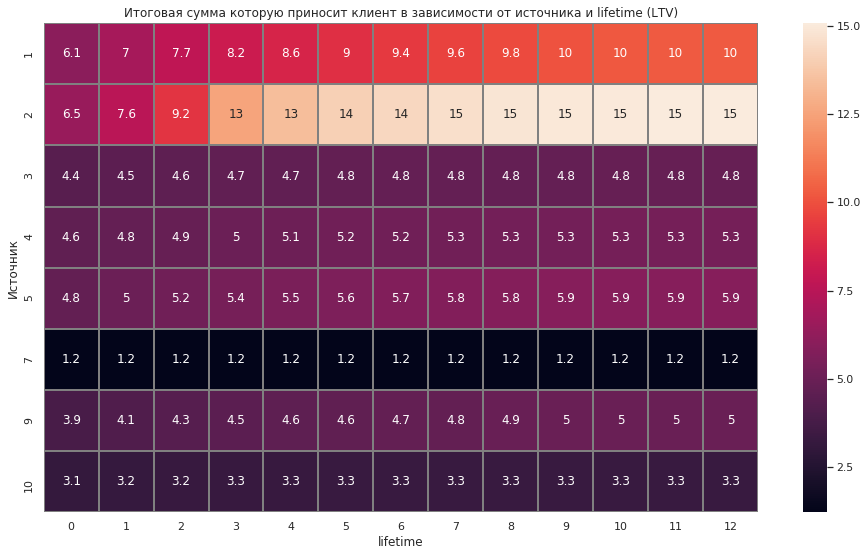

In [72]:
sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('Итоговая сумма которую приносит клиент в зависимости от источника и lifetime (LTV)')
sns.heatmap(ltv, annot=True, linewidths=1, linecolor='grey')
plt.xlabel('lifetime')
plt.ylabel('Источник')
plt.show()

Самые монетизируемые пользователи приходят из источников 1 и 2. Доходы с 1 пользователя этих источников со временем только растут и к концу lifetime превышают показатели остальных источников в 2-3 раза. Расходы на источник 3 (43% бюджета расходов на маркетинг) возможно не оправданы, пользователи из данного источника "самые дорогие" но при этом окупаются они плохо (узнаем точно при вычислении ROMI). Так же обратим внимание на источник 7, в который не было вложений на маркетинг, при этом разовый доход с него есть. Возможно стоит вложиться в маркетинг этого источника.

#### 3. Найдем стоимость привлечения клиента по каждому источнику.

In [73]:
# считаем САС
cac = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index().merge(cohort_sizesd.reset_index(), on = 'source_id')
cac['cac'] = cac['costs'] / cac['cohort_size']
cac = cac.set_index('source_id')
print('Cтоимость привлечения пользователя в зависиомти от источника:')
cac

Cтоимость привлечения пользователя в зависиомти от источника:


,costs,cohort_size,cac
source_id,,,
1,20833.27,3743,5.565928
2,42806.04,4322,9.904220
3,141321.63,9139,15.463577
4,61073.60,9822,6.218041
5,51757.10,6839,7.567934
9,5517.49,1415,3.899286
10,5822.49,1241,4.691773


Видим, что пользователи, привлечённые из 3 источника самые дорогие. Зато источник 1 оптимальный по соотношениям стоимость/последующий доход.

#### 4. Найдем возврат прибыли на маркетинговые инвестиции.

In [74]:
# считаем ROMI
romi = ltv.merge(cac['cac'], on = 'source_id')
# поделим прибыль на затраты
romi = romi.div(romi['cac'], axis = 0).drop(columns = 'cac')
romi

,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,1.087190,1.249148,1.390988,1.467704,1.545126,1.620291,1.686145,1.733680,1.765186,1.807631,1.839036,1.849525,1.850889
2,0.654010,0.767850,0.931713,1.265612,1.353167,1.420871,1.448532,1.474169,1.497993,1.506832,1.514300,1.519031,1.521906
3,0.281934,0.292660,0.298532,0.304211,0.306346,0.308150,0.310284,0.312096,0.312560,0.312856,0.313492,0.313601,0.313633
4,0.746788,0.772855,0.786682,0.807803,0.821830,0.832345,0.838459,0.846192,0.851473,0.854492,0.858369,0.858979,0.859231
5,0.631996,0.662736,0.689410,0.714834,0.730099,0.742737,0.755522,0.763568,0.770655,0.776526,0.777818,0.779481,0.779756
9,0.988125,1.057281,1.108560,1.148742,1.178373,1.191348,1.216450,1.222817,1.264251,1.281117,1.282645,1.282645,1.282645
10,0.666153,0.680589,0.687203,0.696163,0.697861,0.700278,0.703790,0.704960,0.705945,0.705945,0.705945,0.705945,0.706114


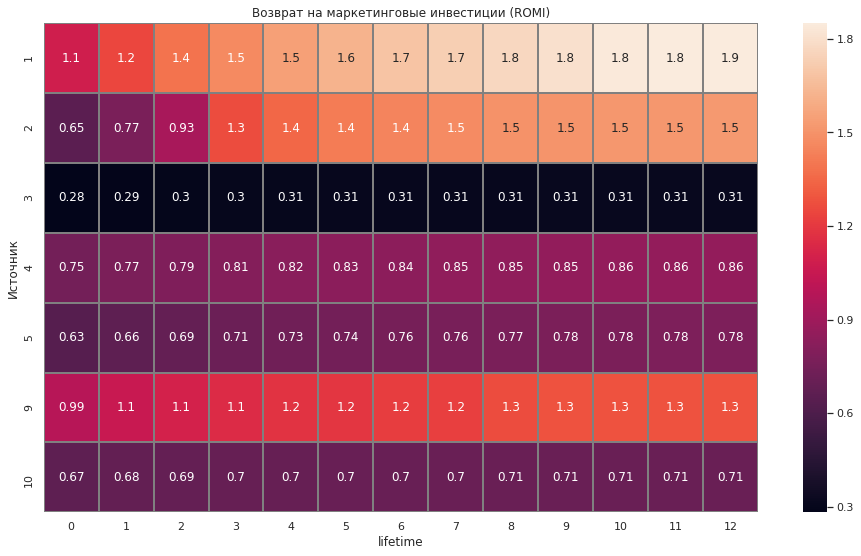

In [75]:
sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('Возврат на маркетинговые инвестиции (ROMI)')
sns.heatmap(romi, annot=True, linewidths=1, linecolor='grey')
plt.xlabel('lifetime')
plt.ylabel('Источник')
plt.show()

Предположения, высказанные ранее подтвердились. Пользователи из источника 1 для нас самые доходные. Источник 2 тоже радует своими показателями. А пользователи из источника 3 самые дорогие, при этом доход, который они приносят меньше вложений на маркетинг. Отделу маркетинга стоит срочно пересмотреть свои расходы на источники.

## 3. Вывод


В подведении итогов важно упомянуть, что мы анализировали данные Яндекс.Афиши. Это сервис, направленный на продажу билетов на разные события (концерты, театр, кино и тд.). Важно понимать специфику сервиса такой направленности, в том, что потенциальный пользователь чаще всего заходя на сервис уже знает на какое событие ему нужно приобрести билет. Поэтому частота использования сервиса для нас не определяющая метрика. Нам важнее что бы мы выигрывали конкуренцию у аналогичных площадок и пользователи возвращались именно к нам. Мы посчитали количество:

- Уникальные пользователи в среднем в день: 907 (метрика DAU)

- Уникальные пользователи в среднем в неделю: 5716 (метрика WAU)

- Уникальные пользователи в среднем в месяц: 23227 (метрика MAU)

Так же выяснили что в среднем на одну сессию у пользователя уходит 60 секунд (метрика ASL). Данного времени вполне хватит что бы приобрести билет на конкретное искомое событие. В качестве рекомендаций можно попробовать удержать пользователя больше времени на платформе (для потенциальной возможности приобретения нескольких билетов на разные события), например, предложить подборку из похожих просмотренных (или уже купленных) событий.
Далее рассмотрели коэффициент удержания пользователей (метрика Retention Rate) на нашей площадке. Для этого применили когортный анализ, разбив всех пользователей на когорты (в зависимости от месяца первой сессии). Только 8% пользователей каждой когорты, в лучшем случае, возвращается на следующий месяц повторно. Но учитывая ранее описанную специфику это не плохой показатель. Но нам важно, чтобы возвращались именно к нам, в случае потребности приобретения билетов на события, поэтому в качестве рекомендации можно предложить, что бы у каждого пользователя за приобретённый билет накапливались баллы, которые можно использовать в качестве скидки на следующий приобретенный билет.
А вот время между первой сессией и первой покупкой чаще всего составляет 60 секунд. Это подтверждает гипотезу что пользователь знает за билетом на какое конкретное событие идет. Это и подтверждается если сравнить: самое частое время сессии = времени которое чаще всего требуется на покупку.
Далее мы перешли к анализу маркетинговых расходов компании для ответов на вопросы: 
1. Сколько в среднем приносит доход каждый клиент в зависимости от источника (метрика LTV):

Мы разбили клиентов на когорты по источникам в зависимости от их времени жизни (lifetime). Метрика LTV накопительная, нам важен прирост в каждый последующий lifetime. И тут лидерами стали источники 1 и 2, имеющие прибыль в 10 и 15 соответственно. В остальных источниках динамика не такая впечатляющая. Особое внимание обратим на источник 3, в который были наибольшие вложения, но средний доход с пользователя по сравнению с лидерами сильно уступает.

2. Как окупаются наши маркетинговые вложения (метрик CAC, ROMI)

Для этого необходимо рассчитать во сколько нам обходится привлечение одного пользователя с конкретного источника (метрика САС). А далее посчитать по формуле LTV / CAC = ROMI. Нам важно, чтобы за меньшие вложения мы получали больший доход в разрезе источников с накопительной суммой в зависимости от lifetime. И главным разочарованием исследования стал источник 3. Отличный пример того, что большие вложения не означает пропорционально большие доходы. 

3. В какие источники лучше всего вкладывать бюджет на маркетинг 

Стоит срочно рекомендовать отделу маркетинга пересмотреть свои вложения в источники. Оптимальное соотношение дохода с каждого пользователя показывают источники 1, 2 и 9. Если вложиться в маркетинг именно этих источников можно увеличить число пользователей, и соответственно прибыль. А вот вложения в источник 3 даже не окупаются хотя большая часть бюджета (43 %) была потрачена именно на этот источник.
